In [1]:
# The paths of the signal and the data set.
AUDIO_FILE = "/home/yaron/Office/Home_Excercise/Tirza/data/mono_1.wav"
DATA_SET = "/home/yaron/Office/Home_Excercise/Tirza/data/SBC001_labels.csv"
print(DATA_SET)
print(AUDIO_FILE)

/home/yaron/Office/Home_Excercise/Tirza/data/SBC001_labels.csv
/home/yaron/Office/Home_Excercise/Tirza/data/mono_1.wav


(33427566,)
22050
(33075,)


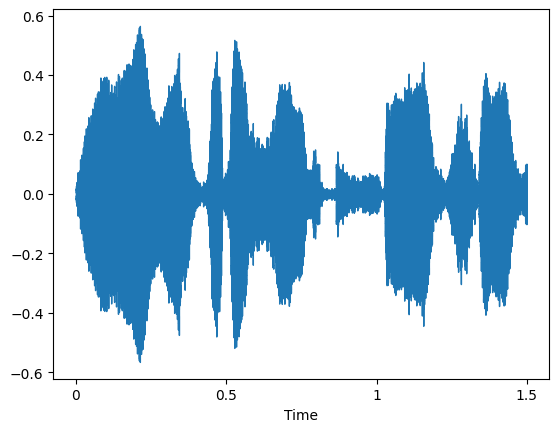

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
y, fs = librosa.load(AUDIO_FILE)
print(y.shape)
print(fs)
y = y[int(16.5*fs):int(18*fs)]
y,_ = librosa.effects.trim(y)
print(y.shape)
librosa.display.waveshow(y, sr=fs)

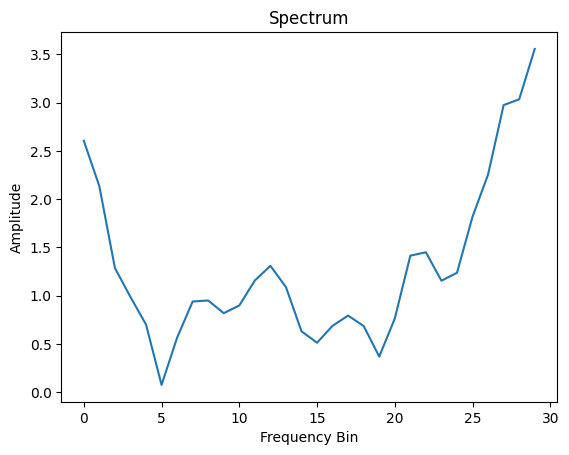

In [10]:
import numpy as np
n_fft = 2048
fft = np.abs(librosa.stft(y[15000:15000+n_fft], n_fft=n_fft, hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

(1025, 65)


Text(0.5, 1.0, 'Spectrogram')

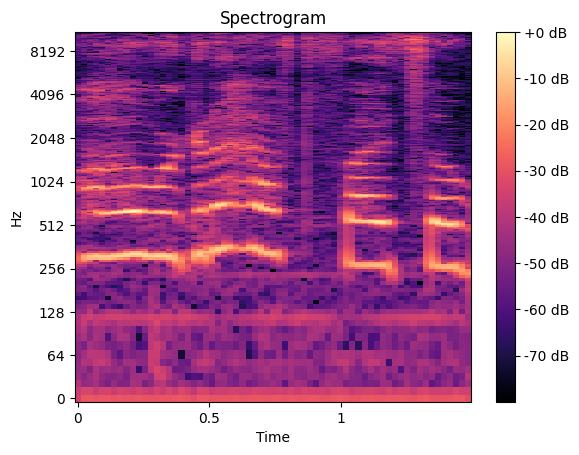

In [11]:
spec = np.abs(librosa.stft(y, hop_length=512))
print(spec.shape)
#print(spec[:20,:10])
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

(128, 65)





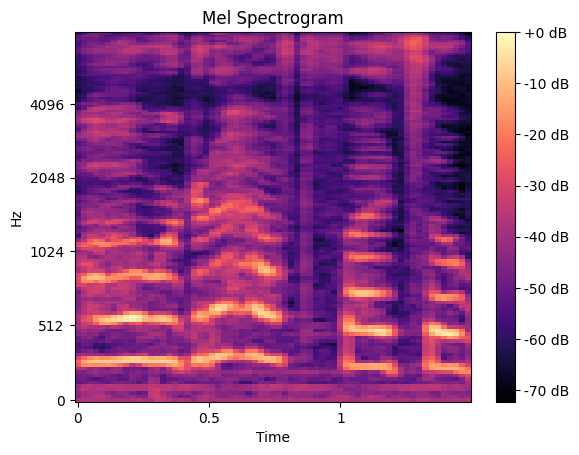

In [14]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=fs, n_fft=2048, hop_length=512)
print(mel_spect.shape)
#print(mel_spect[:20,:10])
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
print("\n\n")
#print(mel_spect[:20,:10])
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')